<a href="https://colab.research.google.com/github/hafishafi/hafisprofile/blob/main/IAI_Pract_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score , roc_curve, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# URL of the CSV file directly from GitHub
github_link = "https://raw.githubusercontent.com/abdelDebug/Breast-Cancer-Dataset/main/breast_cancer_dataset.csv"

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(github_link)

In [3]:
print("Distribution of the target variable ('diagnosis'):")
print(df['diagnosis'].value_counts())

Distribution of the target variable ('diagnosis'):
diagnosis
B    357
M    212
Name: count, dtype: int64


In [4]:
# Getting basic statistics for all columns (finding mean, median, standard deviation, etc.)
print("\nBasic statistics for numerical features:")
print(df.describe())


Basic statistics for numerical features:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std

In [6]:
print (df.shape)

(569, 32)


In [7]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**df['diagnosis']** :selects diagnosis  column in df

**.value_counts(**) :count occurence of each unique value in diagnosisi column

In [9]:
#used to count M and B in diagnosis and stored in target_distrubution
print("/nDistribution of target variable (diagnosis):")
target_distribution = df['diagnosis'].value_counts()
print(target_distribution)

/nDistribution of target variable (diagnosis):
diagnosis
B    357
M    212
Name: count, dtype: int64




*   **sns.countplot()**:count the occurence of each categorical value and display as bars
* x=diagnosis: diagnosis column should only be used in x axis


*   palette='viridis': sets color scheme for the bars in the plot.
*   plt.title :title for the plot

*   plt.xlabel :set label for x axis

*   plt.ylabel: set label for y axis
*   plt.show: display generated plot



<ipython-input-10-a46ae8177242>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis',data=df, palette='viridis')


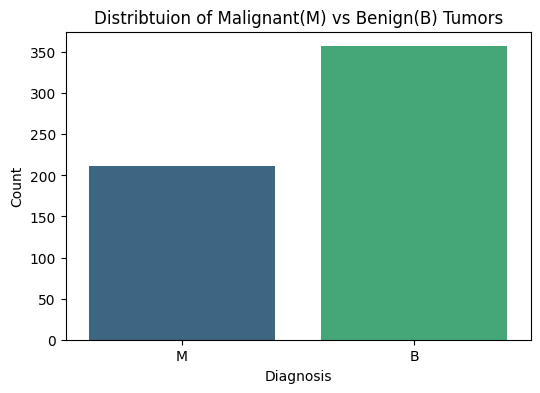

In [10]:
# Visualize this with a bar plot
plt.figure(figsize=(6, 4)) #used to create 600*400 (6inch wide and 4 inch tall) resolution plot
sns.countplot(x='diagnosis',data=df, palette='viridis')
plt.title('Distribtuion of Malignant(M) vs Benign(B) Tumors')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()



*   df.select_dtypes(include=['number']: selects all col in df that have numerical data type (int,float)
* .tolist(): This converts the column names into a Python list []



In [11]:
numerical_features=df.select_dtypes(include=['number']).columns.tolist()
if 'id' in numerical_features:
    numerical_features.remove('id') #removing 'id' from numerical feature

*   .columns: This accesses the column names of the selected numerical columns.
* .tolist(): This converts the column names into a Python list []
* num_plots = len(numerical_features): This gets the total number of numerical features (excluding 'id')
* num_row=(num_plots+num_col-1): This calculates the number of rows needed for the grid based on the number of plots and the number of columns.
* //num_cols : The /

In [16]:
# print("Generating Histogram for numerical features... ")
# num_plots = len(numerical_features) #num of numerical features (exclude 'id')
# num_cols= 4 #num of columns
# num_rows=(num_plots+num_cols-1)//num_cols #calculate the rows needed
# plt.figure(figsize=(num_cols * 4, num_rows * 3)) #Adjust fig size dynamically.
# for i , feature in enumerate(numerical_features):
#   plt.subplot(num_rows, num_cols, i+1) #create subplots
#   sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
#   plt.title(f'Histogram of {feature}')
#   plt.tight_layout() #adjust subplot to fit within the figure area automatically
# plt.show()
# print("\nHISTOGRAM GENERATED")





# **HiSTOGRAM**

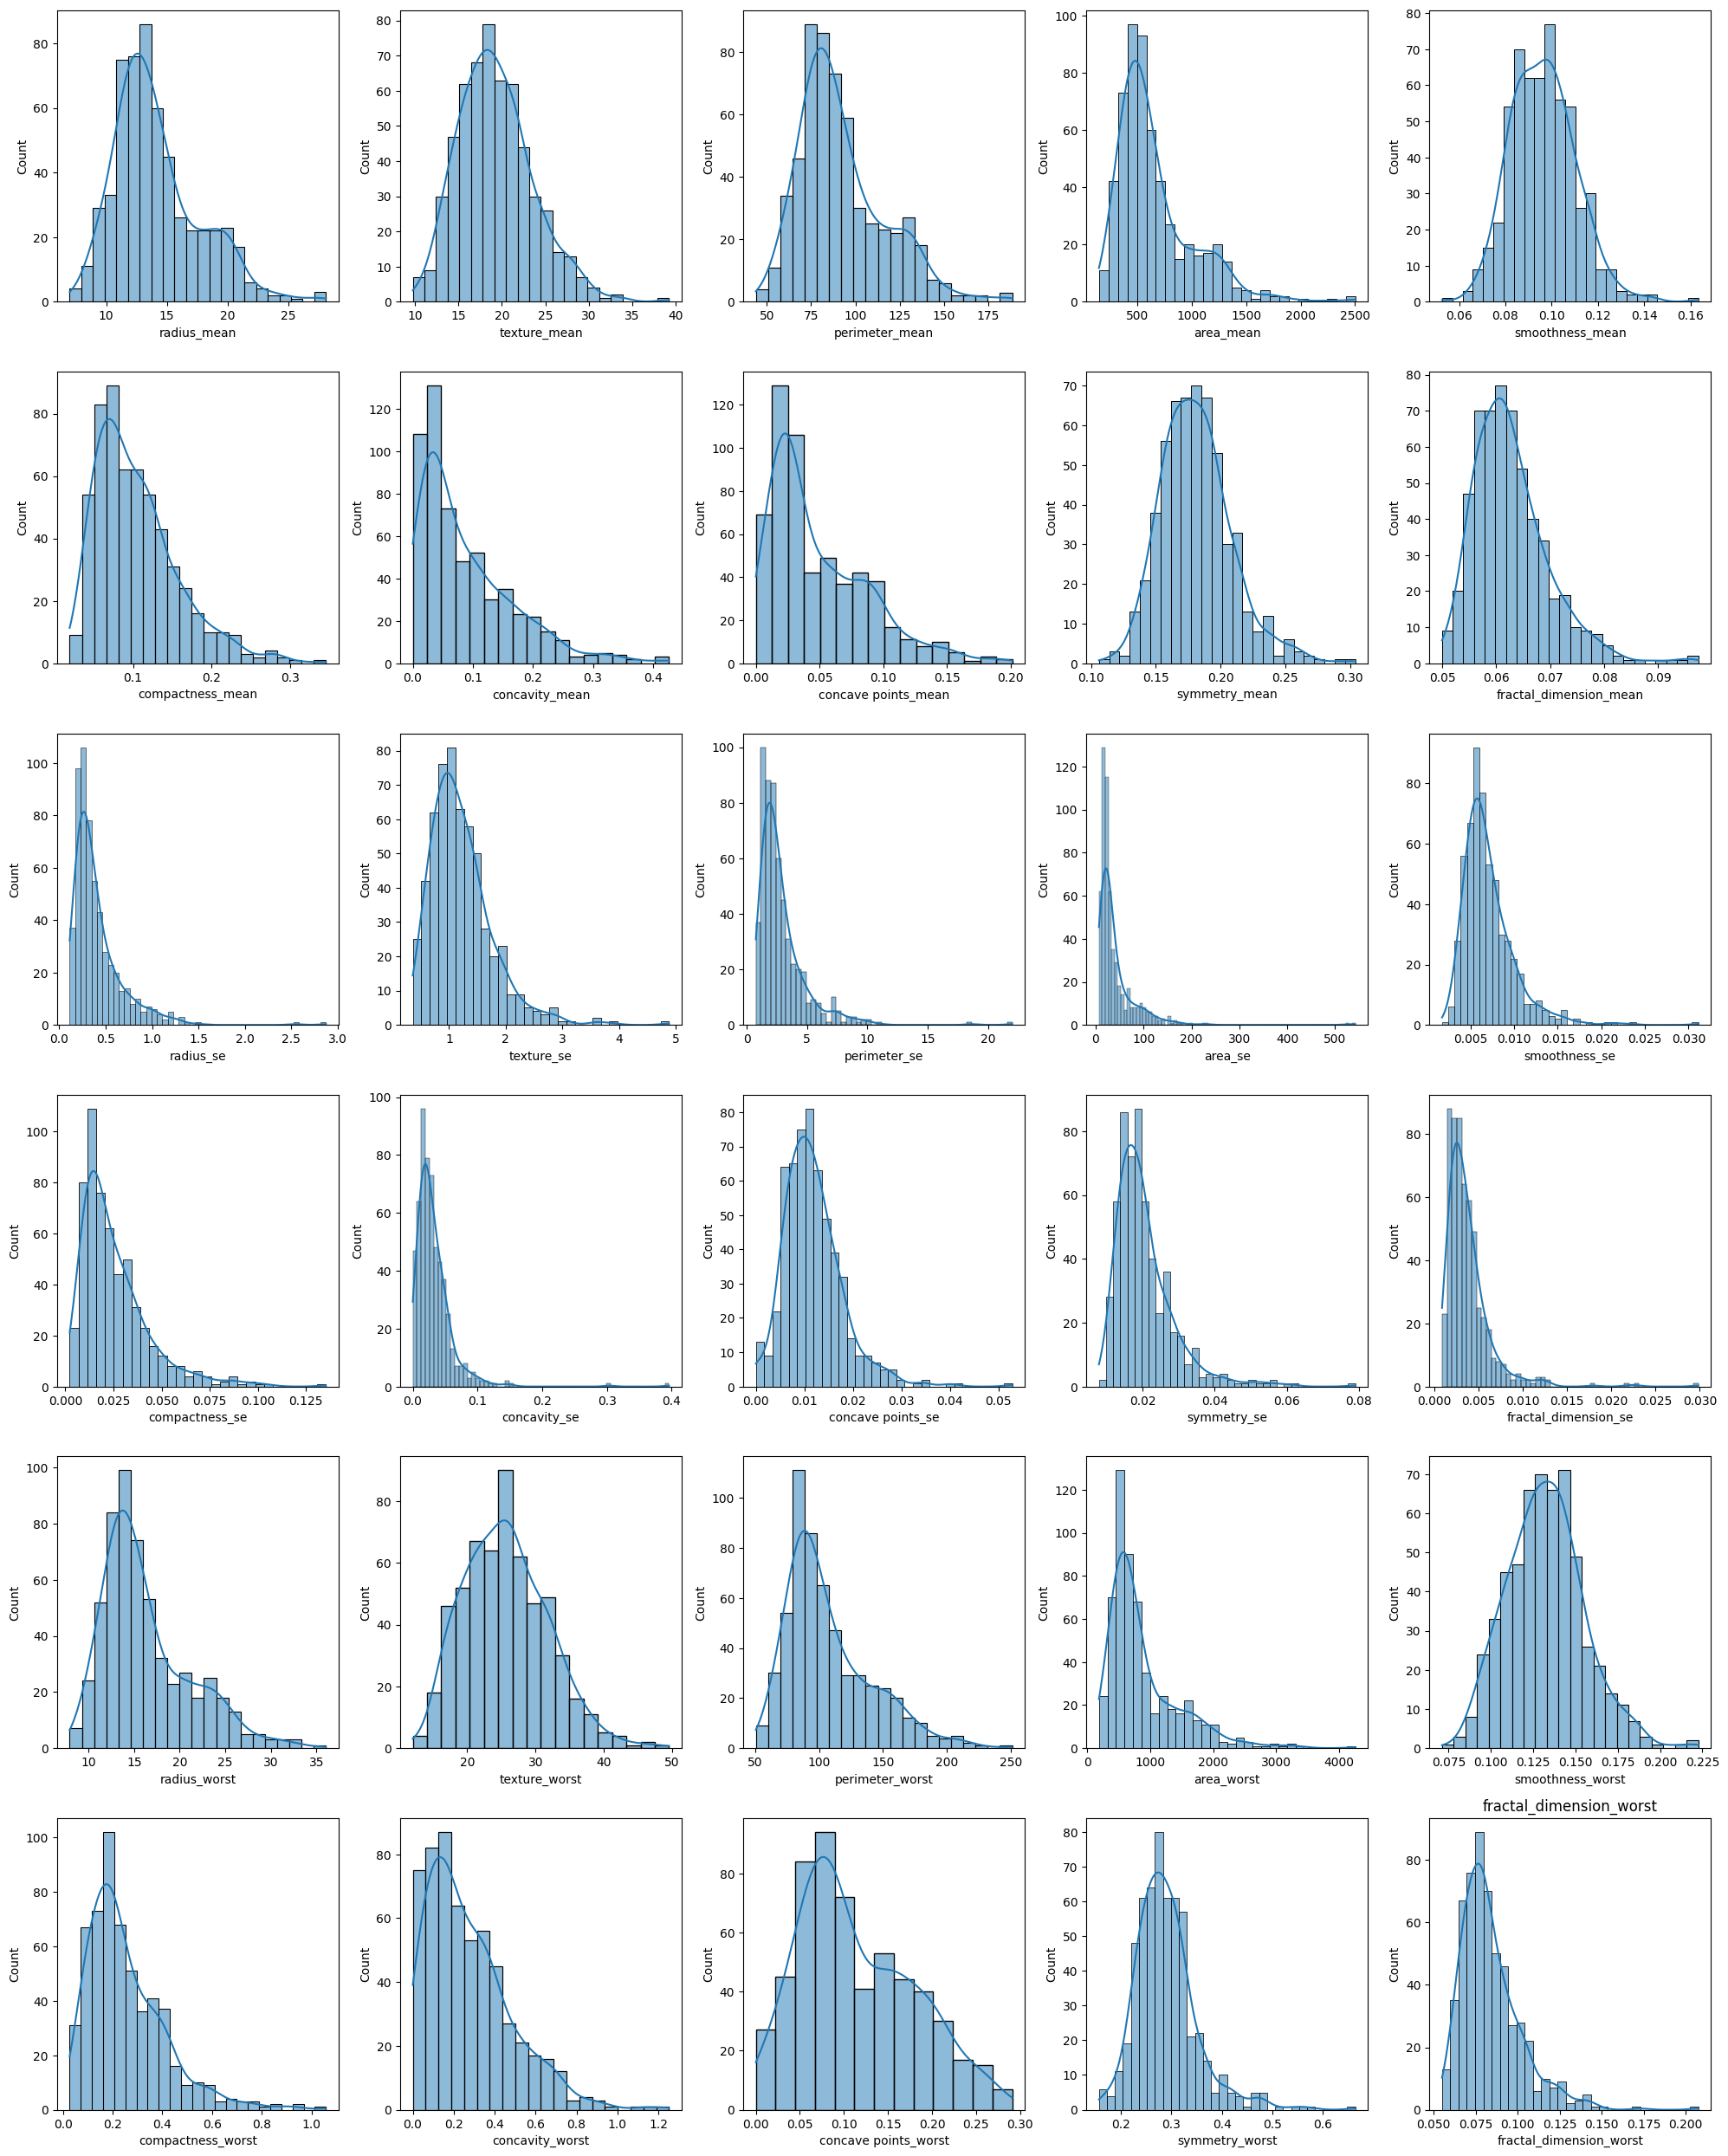

In [14]:
fig, ax = plt.subplots(6,5, figsize=(20,25))

for i, subplot in zip(numerical_features, ax.flatten()):
   sns.histplot(df[i], kde=True, ax=subplot)
plt.title(i)
plt.tight_layout()
plt.show()

 plt.subplot(num_rows, num_cols, i+1) #create subplots
  * num_rows: Specifies the total number of rows in the grid.
  * num_cols: Specifies the total number of columns in the grid.
  * i + 1: Specifies the index of the current subplot (starting from 1). This places each histogram in its correct position within the grid.
  * sns.histplot(): creates Histogram
  * (df[feature]: select data for current numerical feature ,*  kde=True: this add a kernel density estimate (KDE) line to histogra
  * bins=30: This specifies the number of bins (intervals) to use for the histogram. More bins provide more detail about the distribution, but too many can make it appear noisy
  *

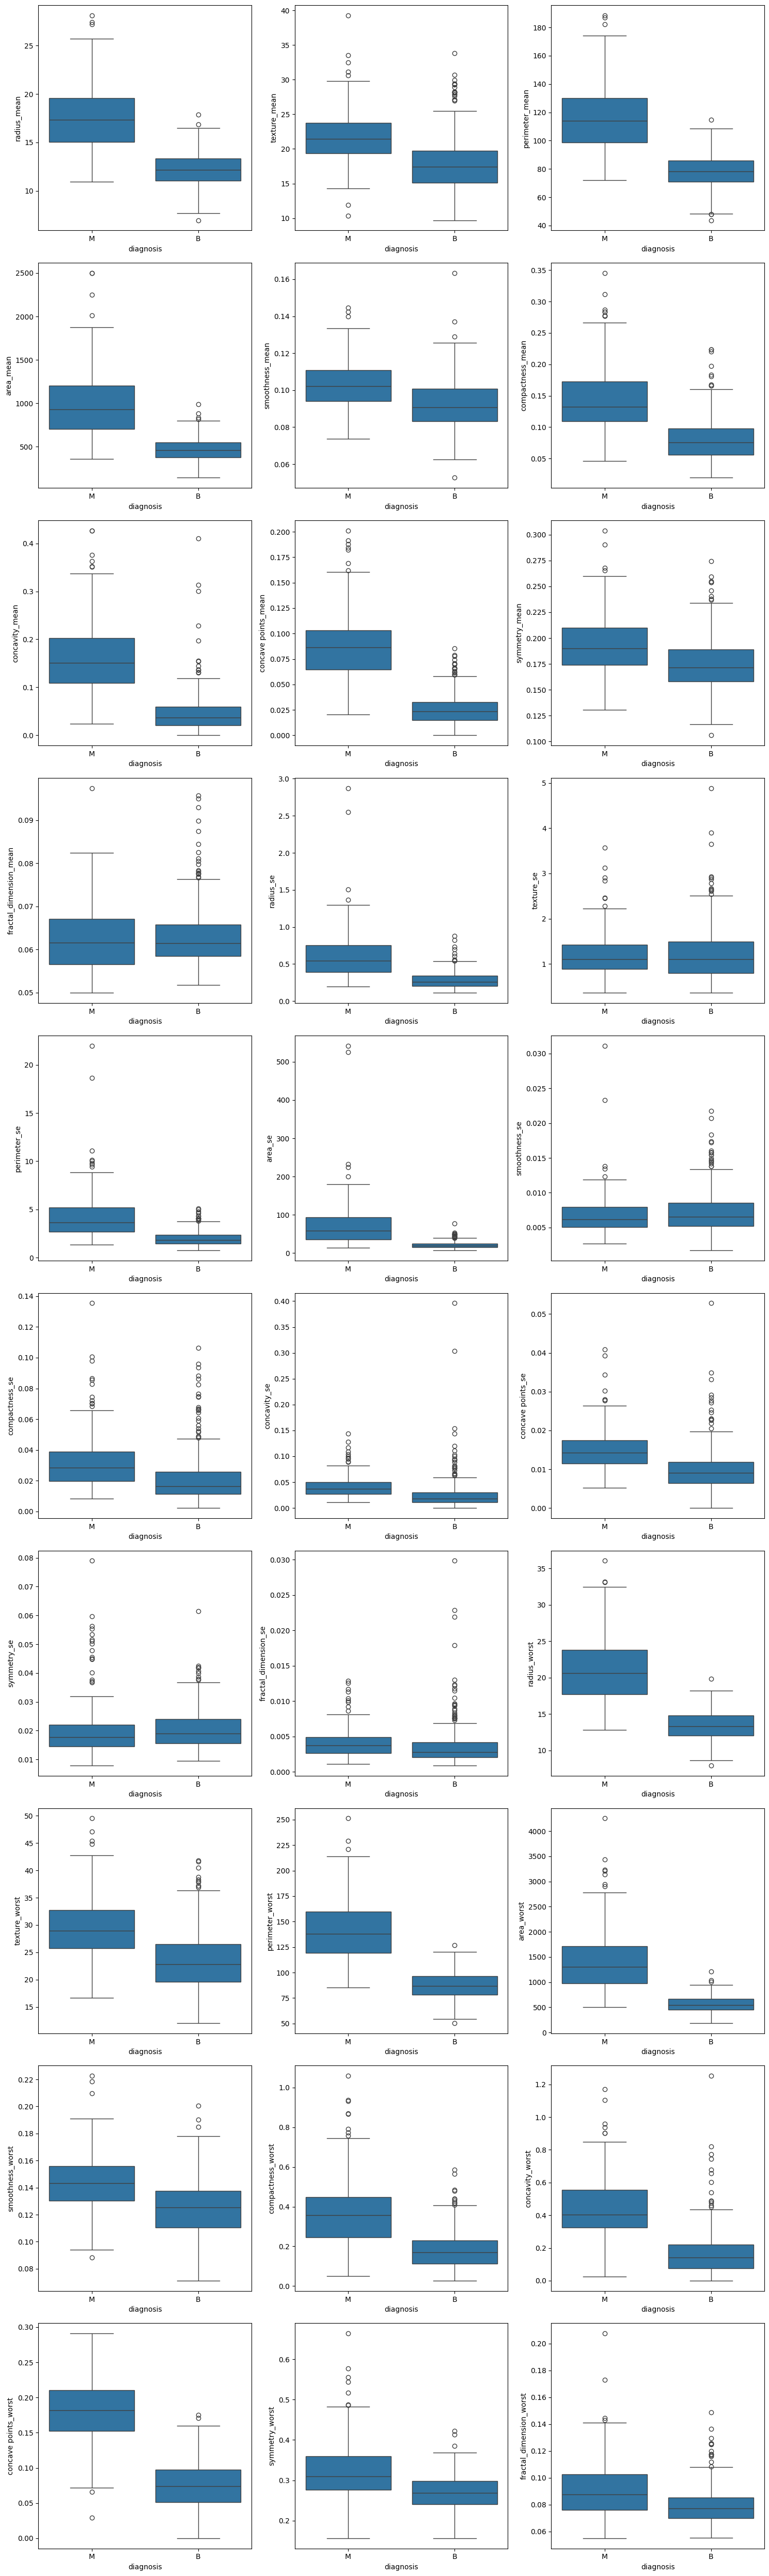

In [15]:
fig, ax = plt.subplots(10,3, figsize=(15,50))

for i, subplot in zip(numerical_features, ax.flatten()):
  sns.boxplot(x ='diagnosis', y=i , data =df, ax=subplot)
plt.tight_layout()
plt.show()

* **Correlation Matrix**: creates a heatmap to visually represent the correlations between all pairs of features in your dataset.
* df_encoded=df.copy():creating a copy of df
* df_encoded['diagnosis']=df_encoded['diagnosis'].map({M:1,'B':0}):mapping M to 1 & B becomes 0 for numerical data
* df_encoded.drop('id', axis=1): Remove  'id' is an identifier  not a feature
* .corr(method='pearson') : calculate pearson coefficient between all pairs of column in df .
* annot=True: Displays the correlation value on each cell of heat map


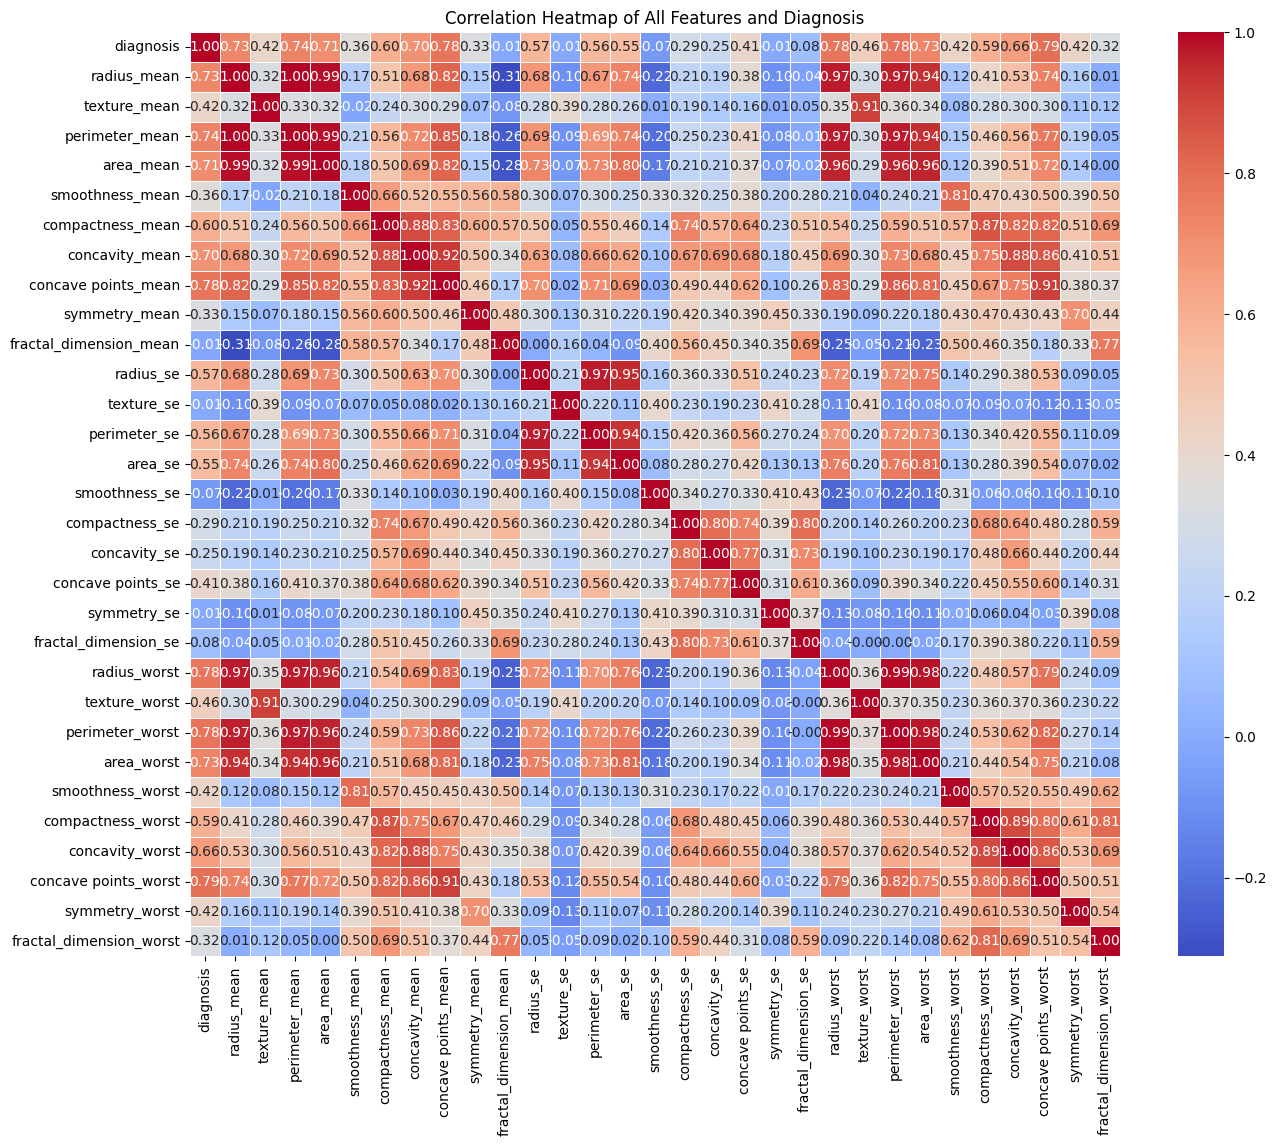


Correlation of Features with Target Variable ('diagnosis'):
diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fra

In [17]:
# Convert 'diagnosis' to numerical (M=1, B=0)
df_encoded = df.copy()
df_encoded['diagnosis'] = df_encoded['diagnosis'].map({'M': 1, 'B': 0})

# Calculate the correlation matrix (excluding 'id')
correlation_matrix = df_encoded.drop('id', axis=1).corr(method='pearson')

# Plot the correlation heatmap
plt.figure(figsize=(15, 12)) # Adjusted size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of All Features and Diagnosis')
plt.show()

# Print sorted correlations with the 'diagnosis' target
print("\nCorrelation of Features with Target Variable ('diagnosis'):")
print(correlation_matrix['diagnosis'].sort_values(ascending=False))


In [18]:
# Iterate over numerical columns
for col1 in numerical_features:
    for col2 in numerical_features:
        if col1 != col2 and correlation_matrix.loc[col1, col2] >= 0.95:
            print(f"{col1:<20} {col2:<20}: {correlation_matrix.loc[col1, col2]:.2f}")

radius_mean          perimeter_mean      : 1.00
radius_mean          area_mean           : 0.99
radius_mean          radius_worst        : 0.97
radius_mean          perimeter_worst     : 0.97
perimeter_mean       radius_mean         : 1.00
perimeter_mean       area_mean           : 0.99
perimeter_mean       radius_worst        : 0.97
perimeter_mean       perimeter_worst     : 0.97
area_mean            radius_mean         : 0.99
area_mean            perimeter_mean      : 0.99
area_mean            radius_worst        : 0.96
area_mean            perimeter_worst     : 0.96
area_mean            area_worst          : 0.96
radius_se            perimeter_se        : 0.97
radius_se            area_se             : 0.95
perimeter_se         radius_se           : 0.97
area_se              radius_se           : 0.95
radius_worst         radius_mean         : 0.97
radius_worst         perimeter_mean      : 0.97
radius_worst         area_mean           : 0.96
radius_worst         perimeter_worst    

In [19]:
x=df.drop(['id','diagnosis'], axis=1)
y=df['diagnosis']
print("Feature (X) shape:",x.shape)
print("Target (y) shape:",y.shape)
print("\nFirst 5 rows of features (X):")
print(x.head())
print("\nFirst 5 rows of target (y):")
print(y.head())

Feature (X) shape: (569, 30)
Target (y) shape: (569,)

First 5 rows of features (X):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   frac

# *Identifying missing values*

In [20]:
print("\nIdentifying Missing values")
missing_values=df.isnull().sum() #counts missing values per column
print(missing_values)


Identifying Missing values
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [21]:
X=df.drop(['id','diagnosis'], axis=1)
y=df['diagnosis']
print("Feature (X) shape:",{X.shape})
print("Target (y) shape:",{y.shape})
print("\nFirst 5 rows of features (X):")
print(X.head())
print("\nFirst 5 rows of target (y):")
print(y.head())


Feature (X) shape: {(569, 30)}
Target (y) shape: {(569,)}

First 5 rows of features (X):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   

 # Split Data into Training and Testing Sets
   - X_train, y_train: Used to train the machine learning models.
   - X_test, y_test: Used to evaluate the trained models on unseen data.

   - test_size=0.2: 20% of the data will be used for testing, and 80% for training.
   - random_state=42: This ensures that your data split is consistent and reproducible every time you run the code.


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 )
print("\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



Data split into training and testing sets:
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


# ***Feature Scaling using StandardScaler***
  
  Machine learning algorithms often perform better when numerical features are on a similar scale.
  StandardScaler is used to standardize the dataset.

  * fit() -- calculates the mean and standard deviation for each feature in this (X_train) training data .
  * transform()--applies the standardization using the learned means and standard deviations to the training data (X_train).
  * X_train_scaled--new array where the features in the training set are now scaled.


In [23]:
# StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Converting the scaled NumPy arrays back into pandas DataFrames. it makes the scaled data more accessible and understandable



In [24]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

the data is now fully processed, split into training and testing sets (X_train_scaled_df, X_test_scaled_df, y_train, y_test), and scaled appropriately.

# TRAINING ALGORITHMS

In [25]:

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled_df, y_train)
print("\nLogistic Regression Model trained........")


svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled_df, y_train)
print("\nSupport Vector Machine (SVM) Model trained..........")


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled_df, y_train)
print("\nDecision Tree Model trained...........")


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled_df, y_train)
print("\nRandom Forest Model trained...........")


knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled_df, y_train)
print("\nK-Nearest Neighbors (KNN) Model trained..........")


Logistic Regression Model trained........

Support Vector Machine (SVM) Model trained..........

Decision Tree Model trained...........

Random Forest Model trained...........

K-Nearest Neighbors (KNN) Model trained..........


# TESTING EVERY ALGORITHM

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
knn_pred = knnmodel.predict(X_test)


In [28]:
cm=confusion_matrix(y_test,knn_pred)
print("Confusion matrix : \n",cm)
cr=classification_report(y_test,knn_pred)
print("Classification report : \n",cr)
accuracy=accuracy_score(y_test,knn_pred)
print("Accuracy : %.2f", accuracy*100)

Confusion matrix : 
 [[71  0]
 [ 5 38]]
Classification report : 
               precision    recall  f1-score   support

           B       0.93      1.00      0.97        71
           M       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy : %.2f 95.6140350877193


**SVC**

In [30]:
from sklearn.svm import SVC
model = SVC(probability=True,random_state=42)
model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [31]:
svc_pred = model.predict(X_test)


In [32]:
cm=confusion_matrix(y_test,svc_pred)
print("Confusion matrix : \n",cm)
cr=classification_report(y_test,svc_pred)
print("Classification report : \n",cr)
accuracy=accuracy_score(y_test,svc_pred)
print("Accuracy : %.2f", accuracy*100)

Confusion matrix : 
 [[71  0]
 [ 6 37]]
Classification report : 
               precision    recall  f1-score   support

           B       0.92      1.00      0.96        71
           M       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy : %.2f 94.73684210526315


# **RandomForestClassifier**

In [33]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred=rf_model.predict(X_test)


In [35]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix : \n",cm)
cr=classification_report(y_test,y_pred)
print("Classification report : \n",cr)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy : %.2f", accuracy*100)

Confusion matrix : 
 [[70  1]
 [ 3 40]]
Classification report : 
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy : %.2f 96.49122807017544


# **DecisionTreeClassifier**

In [36]:
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
dtree_predict=dtree.predict(X_test)


In [38]:
cm=confusion_matrix(y_test,dtree_predict)
print("Confusion matrix : \n",cm)
cr=classification_report(y_test,dtree_predict)
print("Classification report : \n",cr)
accuracy=accuracy_score(y_test,dtree_predict)
print("Accuracy : %.2f", accuracy*100)

Confusion matrix : 
 [[68  3]
 [ 3 40]]
Classification report : 
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy : %.2f 94.73684210526315


# LogisticRegression

In [40]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [41]:
logreg_pred = logreg.predict(X_test)


In [42]:
cm=confusion_matrix(y_test,logreg_pred)
print("Confusion matrix : \n",cm)
cr=classification_report(y_test,logreg_pred)
print("Classification report : \n",cr)
accuracy=accuracy_score(y_test,logreg_pred)
print("Accuracy : %.2f", accuracy*100)

Confusion matrix : 
 [[70  1]
 [ 4 39]]
Classification report : 
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy : %.2f 95.6140350877193


--- Starting Task 4: Model Evaluation (Generating Visualizations) ---

Generating Confusion Matrix Heatmaps...


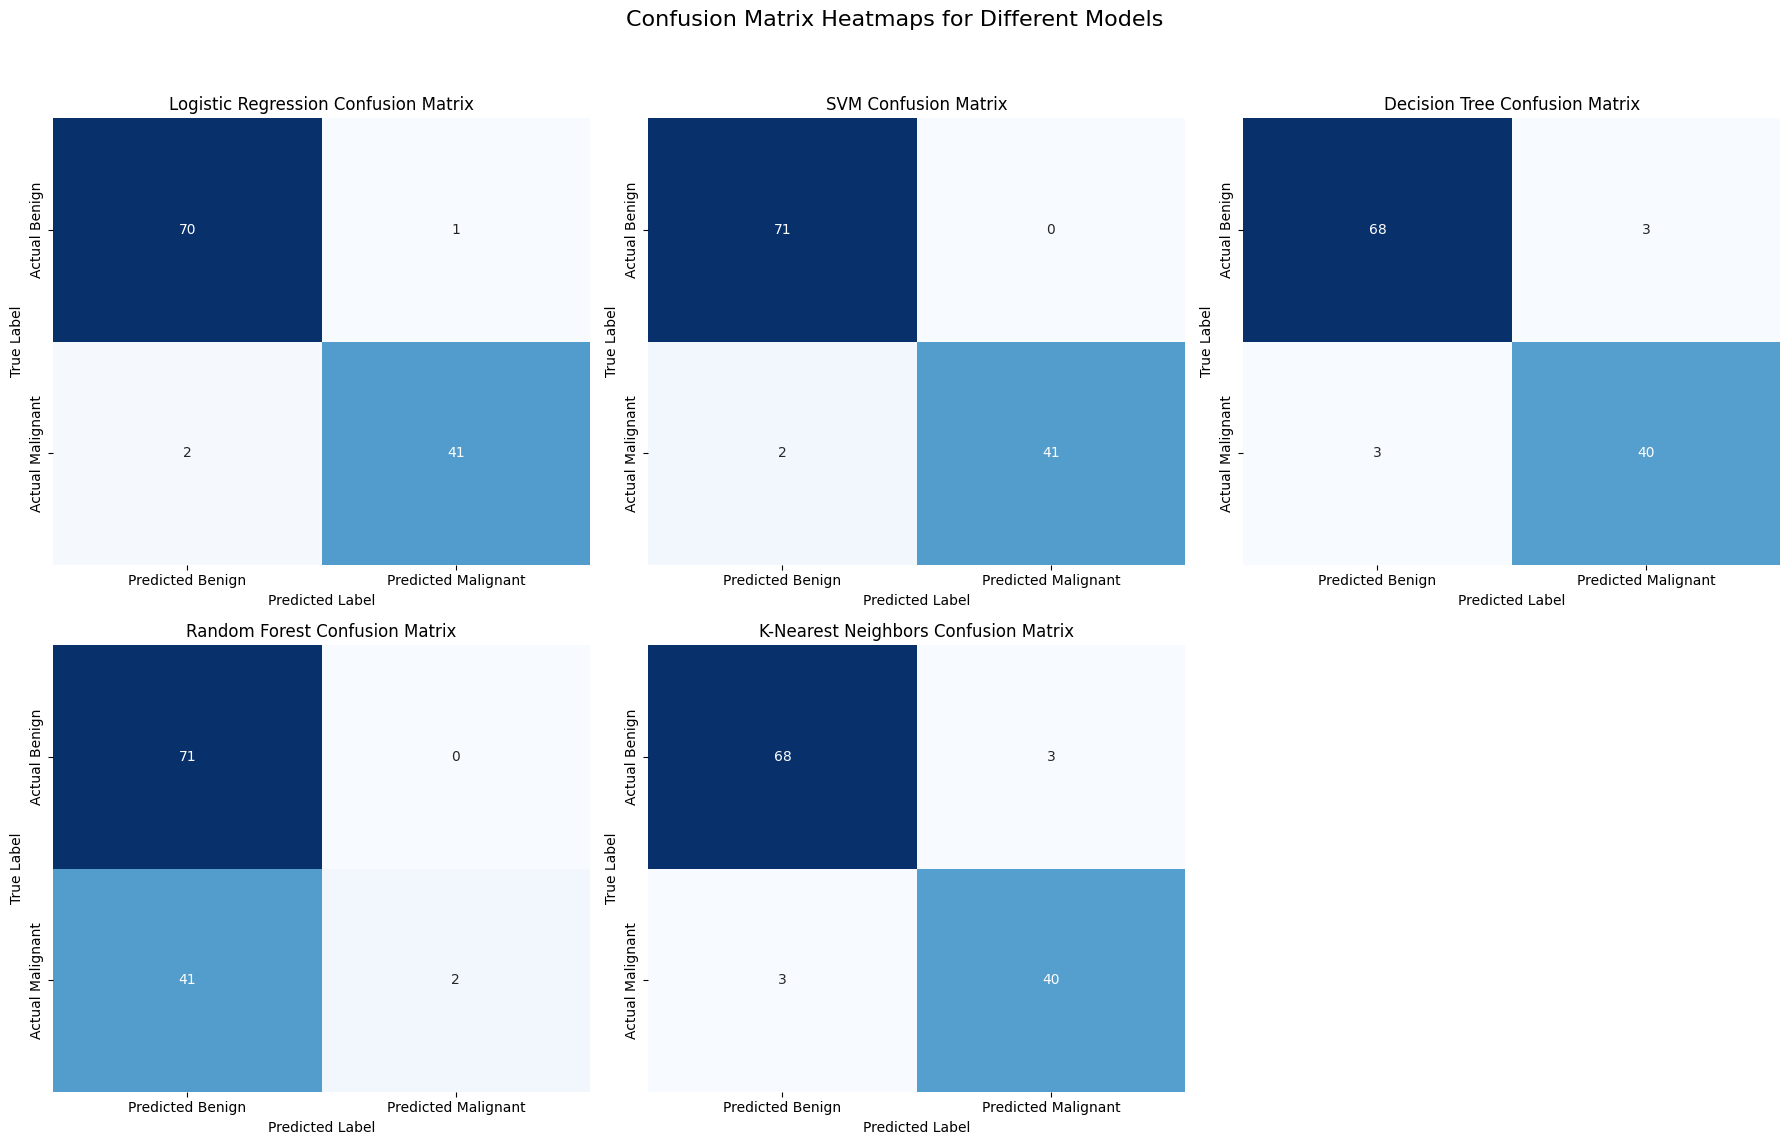

Confusion Matrix Heatmaps generated.


In [43]:
print("--- Starting Task 4: Model Evaluation (Generating Visualizations) ---")

# Store trained models in a dictionary for easy looping
models = {
    'Logistic Regression': log_reg_model,
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'K-Nearest Neighbors': knn_model
}

# --- Plotting Confusion Matrix Heatmaps for each model ---

print("\nGenerating Confusion Matrix Heatmaps...")
fig_cm, axes_cm = plt.subplots(nrows=2, ncols=3, figsize=(18, 12)) # Create a grid for CMs
axes_cm = axes_cm.flatten() # Flatten the 2D array of axes for easy iteration
fig_cm.suptitle('Confusion Matrix Heatmaps for Different Models', fontsize=16)

for i, (name, model) in enumerate(models.items()):
    ax = axes_cm[i]
    y_pred = model.predict(X_test_scaled_df)
    cm = confusion_matrix(y_test, y_pred, labels=['B', 'M']) # Ensure labels order for consistency

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Predicted Benign', 'Predicted Malignant'],
                yticklabels=['Actual Benign', 'Actual Malignant'])
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Hide any unused subplots if the number of models is not a perfect multiple of grid size
for j in range(len(models), len(axes_cm)):
    fig_cm.delaxes(axes_cm[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()
print("Confusion Matrix Heatmaps generated.")




Generating ROC Curves...
  Skipping ROC curve for SVM (predict_proba not available).


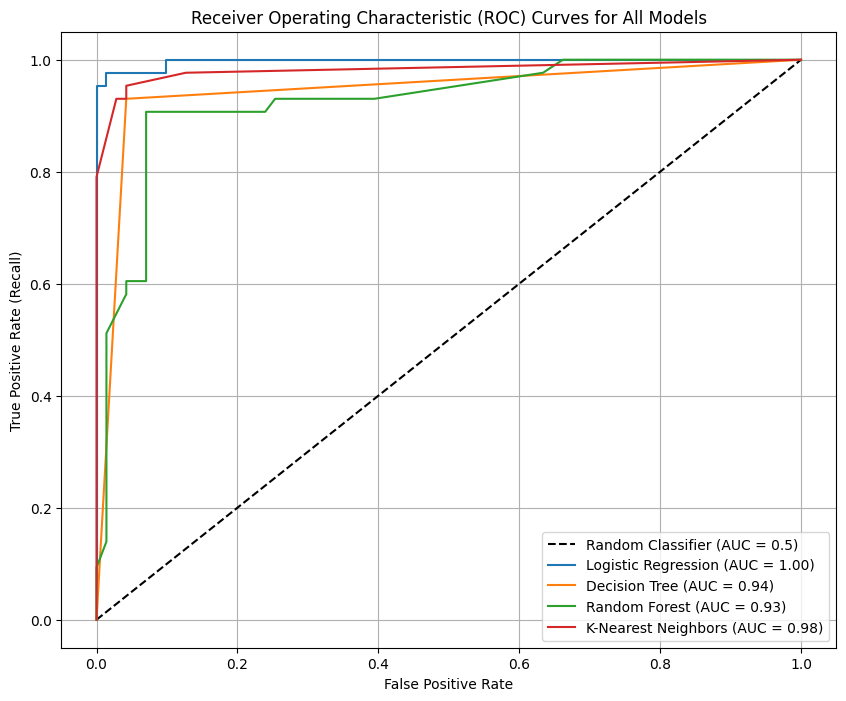

ROC Curves generated.

--- Model Evaluation Visualizations Completed. ---


In [44]:

# --- Plotting ROC Curves for all models on a single graph ---
print("\nGenerating ROC Curves...")
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)') # Baseline random classifier

for name, model in models.items():
    # Only plot ROC if model has predict_proba
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled_df)[:, 1] # Probability of 'M' class
        fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='M')
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    else:
        print(f"  Skipping ROC curve for {name} (predict_proba not available).")


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("ROC Curves generated.")

print("\n--- Model Evaluation Visualizations Completed. ---")
